In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
rand_state=1000

In [50]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli4Polygon.txt') 

In [49]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli4Polygon.csv', index=None)

In [51]:
df = pd.read_table('AOI_hitStimuli4Polygon.csv')

In [52]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon
0,Skilled,602,229,366,605,232,0
1,Skilled,605,231,366,605,232,0
2,Skilled,605,229,366,605,232,0
3,Skilled,606,229,366,605,232,0
4,Skilled,608,229,366,605,232,0


In [53]:
df.nunique()

Skill_level                   2
Gaze_point_X                815
Gaze_point_Y                762
Gaze_event_duration         102
Fixation_point_X            374
Fixation_point_Y            423
AOI_hit_Stimuli4_Polygon      2
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18043 entries, 0 to 18042
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Skill_level               18043 non-null  object
 1   Gaze_point_X              18043 non-null  int64 
 2   Gaze_point_Y              18043 non-null  int64 
 3   Gaze_event_duration       18043 non-null  int64 
 4   Fixation_point_X          18043 non-null  int64 
 5   Fixation_point_Y          18043 non-null  int64 
 6   AOI_hit_Stimuli4_Polygon  18043 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 986.9+ KB


In [55]:
df.isna().sum()

Skill_level                 0
Gaze_point_X                0
Gaze_point_Y                0
Gaze_event_duration         0
Fixation_point_X            0
Fixation_point_Y            0
AOI_hit_Stimuli4_Polygon    0
dtype: int64

In [56]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon
count,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000
mean,792.014465,297.536385,615.366846,791.823865,297.592418,0.540099
std,165.894870,128.723270,584.985669,165.469358,127.863779,0.498403
min,108.000000,-11.000000,66.000000,122.000000,6.000000,0.000000
25%,691.000000,214.000000,250.000000,687.000000,215.000000,0.000000
50%,853.000000,276.000000,416.000000,854.000000,276.000000,1.000000
75%,901.000000,354.000000,732.000000,899.000000,354.000000,1.000000
max,1322.000000,1101.000000,2812.000000,1260.000000,875.000000,1.000000


<Figure size 600x400 with 0 Axes>

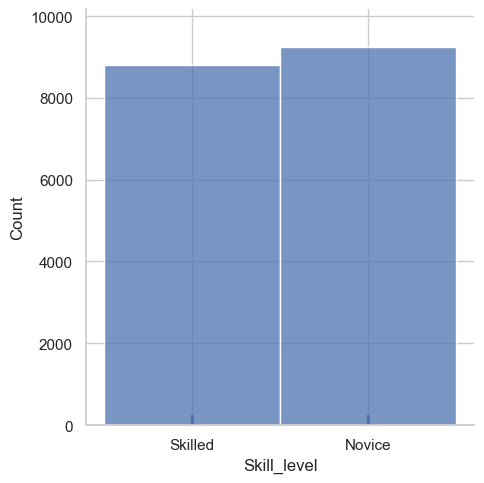

In [57]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [58]:
ordinal_categoricals = ['Skill_level']

In [59]:
from sklearn.preprocessing import OrdinalEncoder

In [60]:
enc = OrdinalEncoder()

In [61]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [62]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon
0,1.0,602,229,366,605,232,0
1,1.0,605,231,366,605,232,0
2,1.0,605,229,366,605,232,0
3,1.0,606,229,366,605,232,0
4,1.0,608,229,366,605,232,0


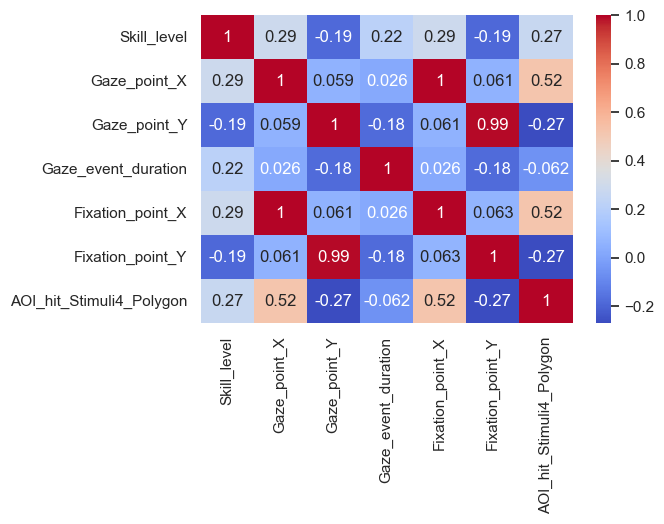

In [63]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 8.48 s
Wall time: 8.66 s


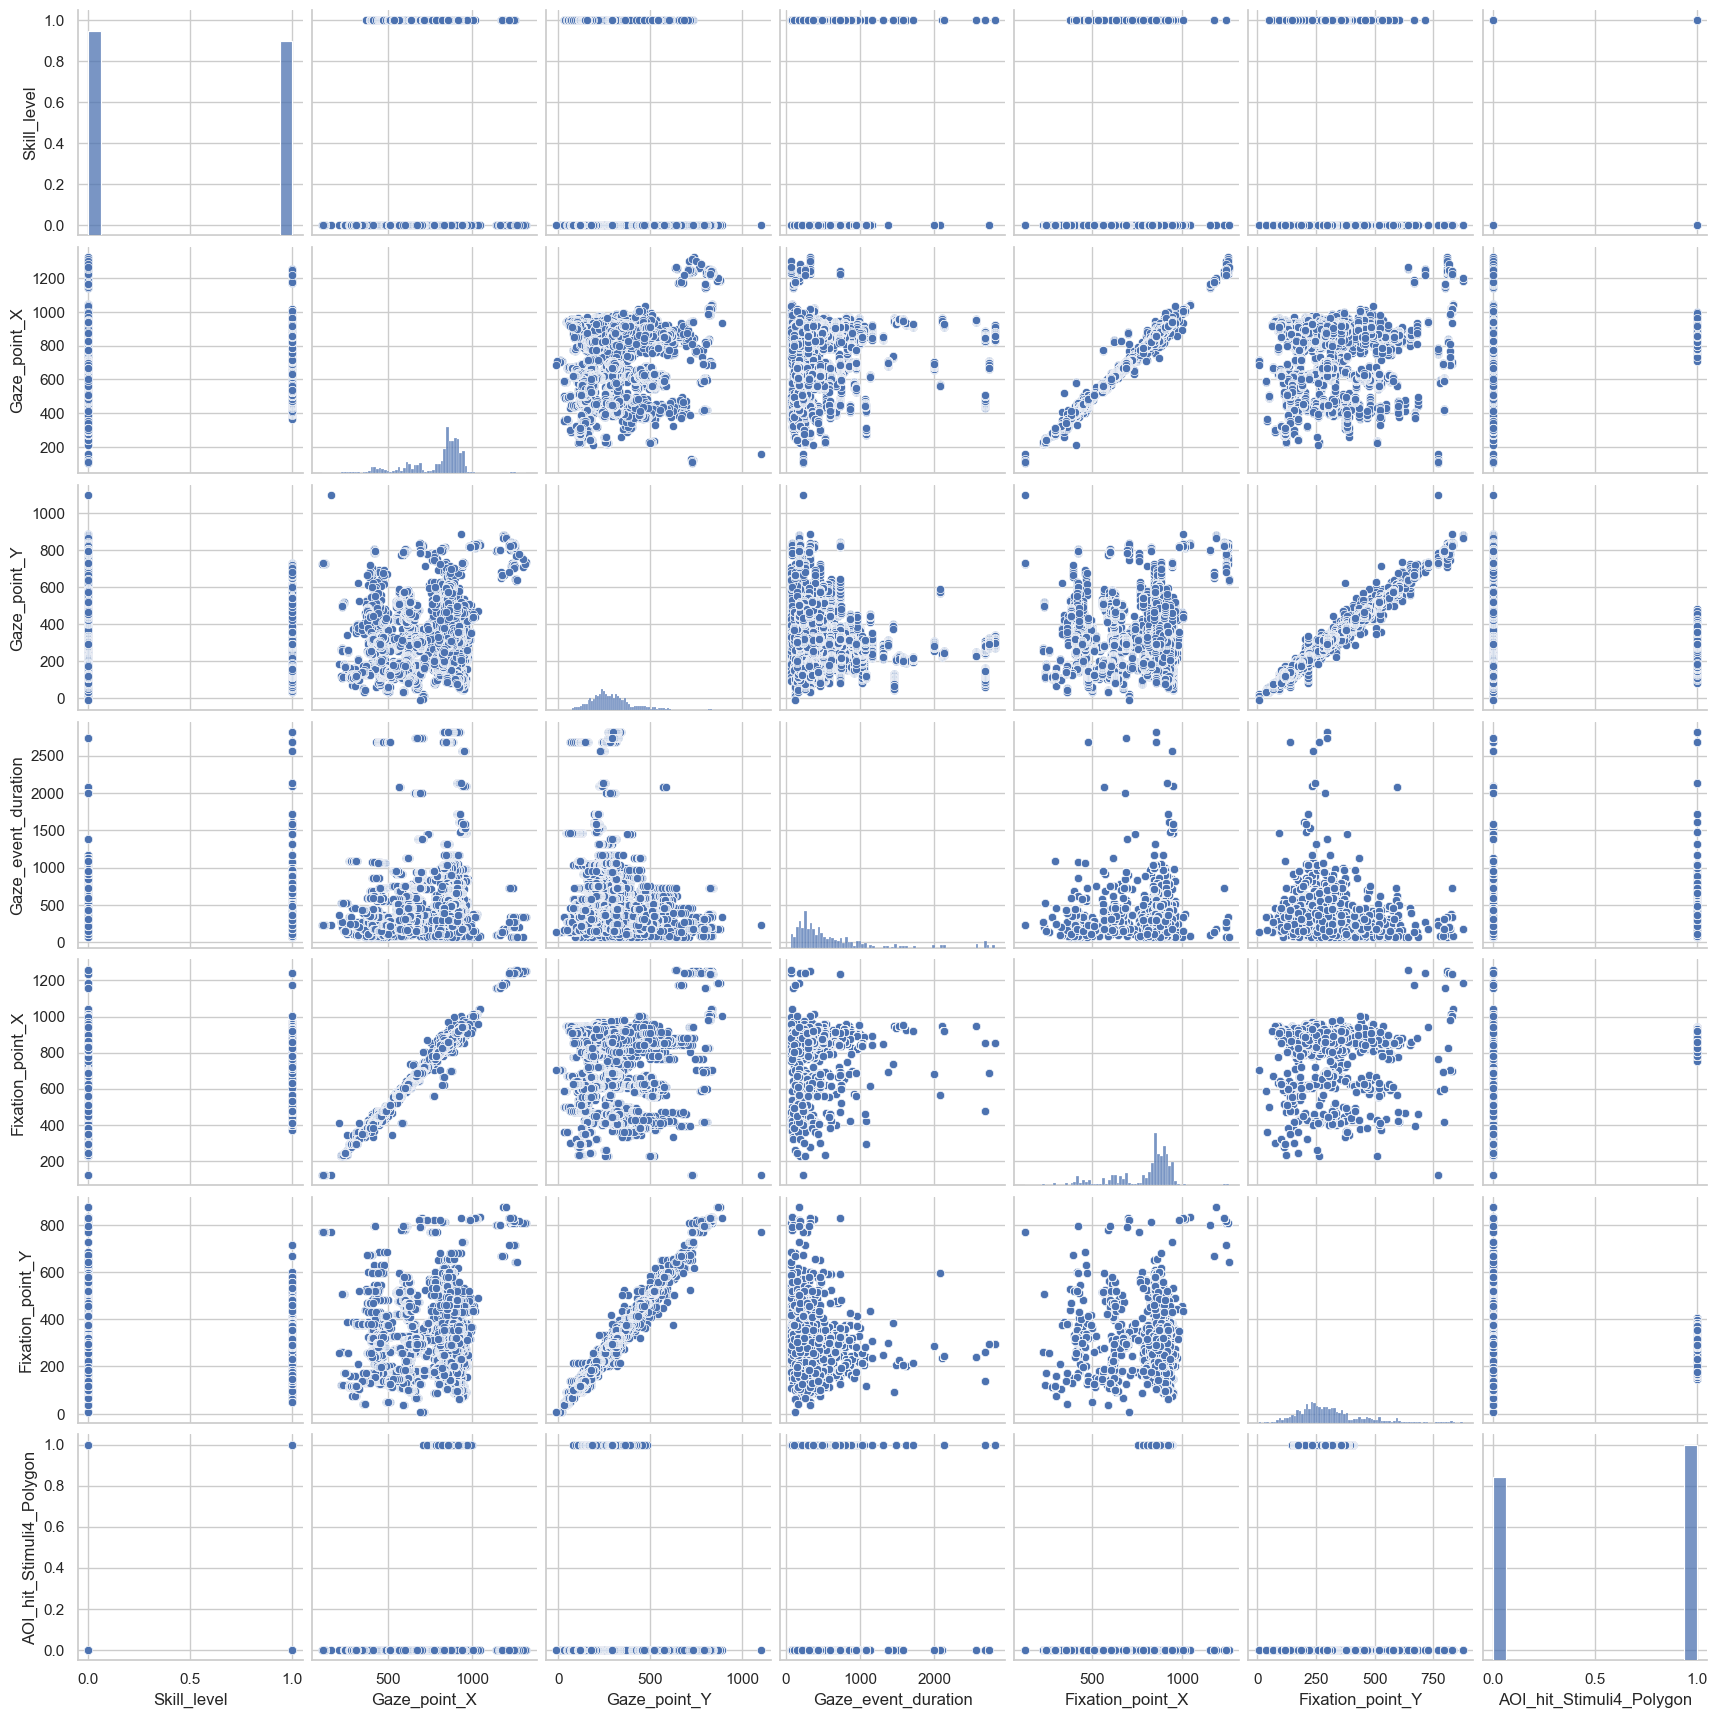

In [64]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli4_Polygon' ]])

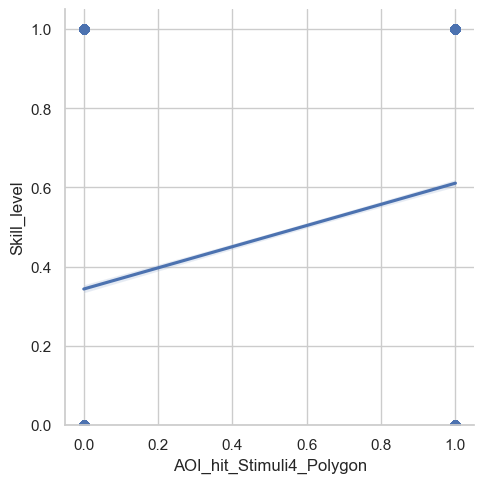

In [65]:
g= sns.lmplot(x='AOI_hit_Stimuli4_Polygon', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

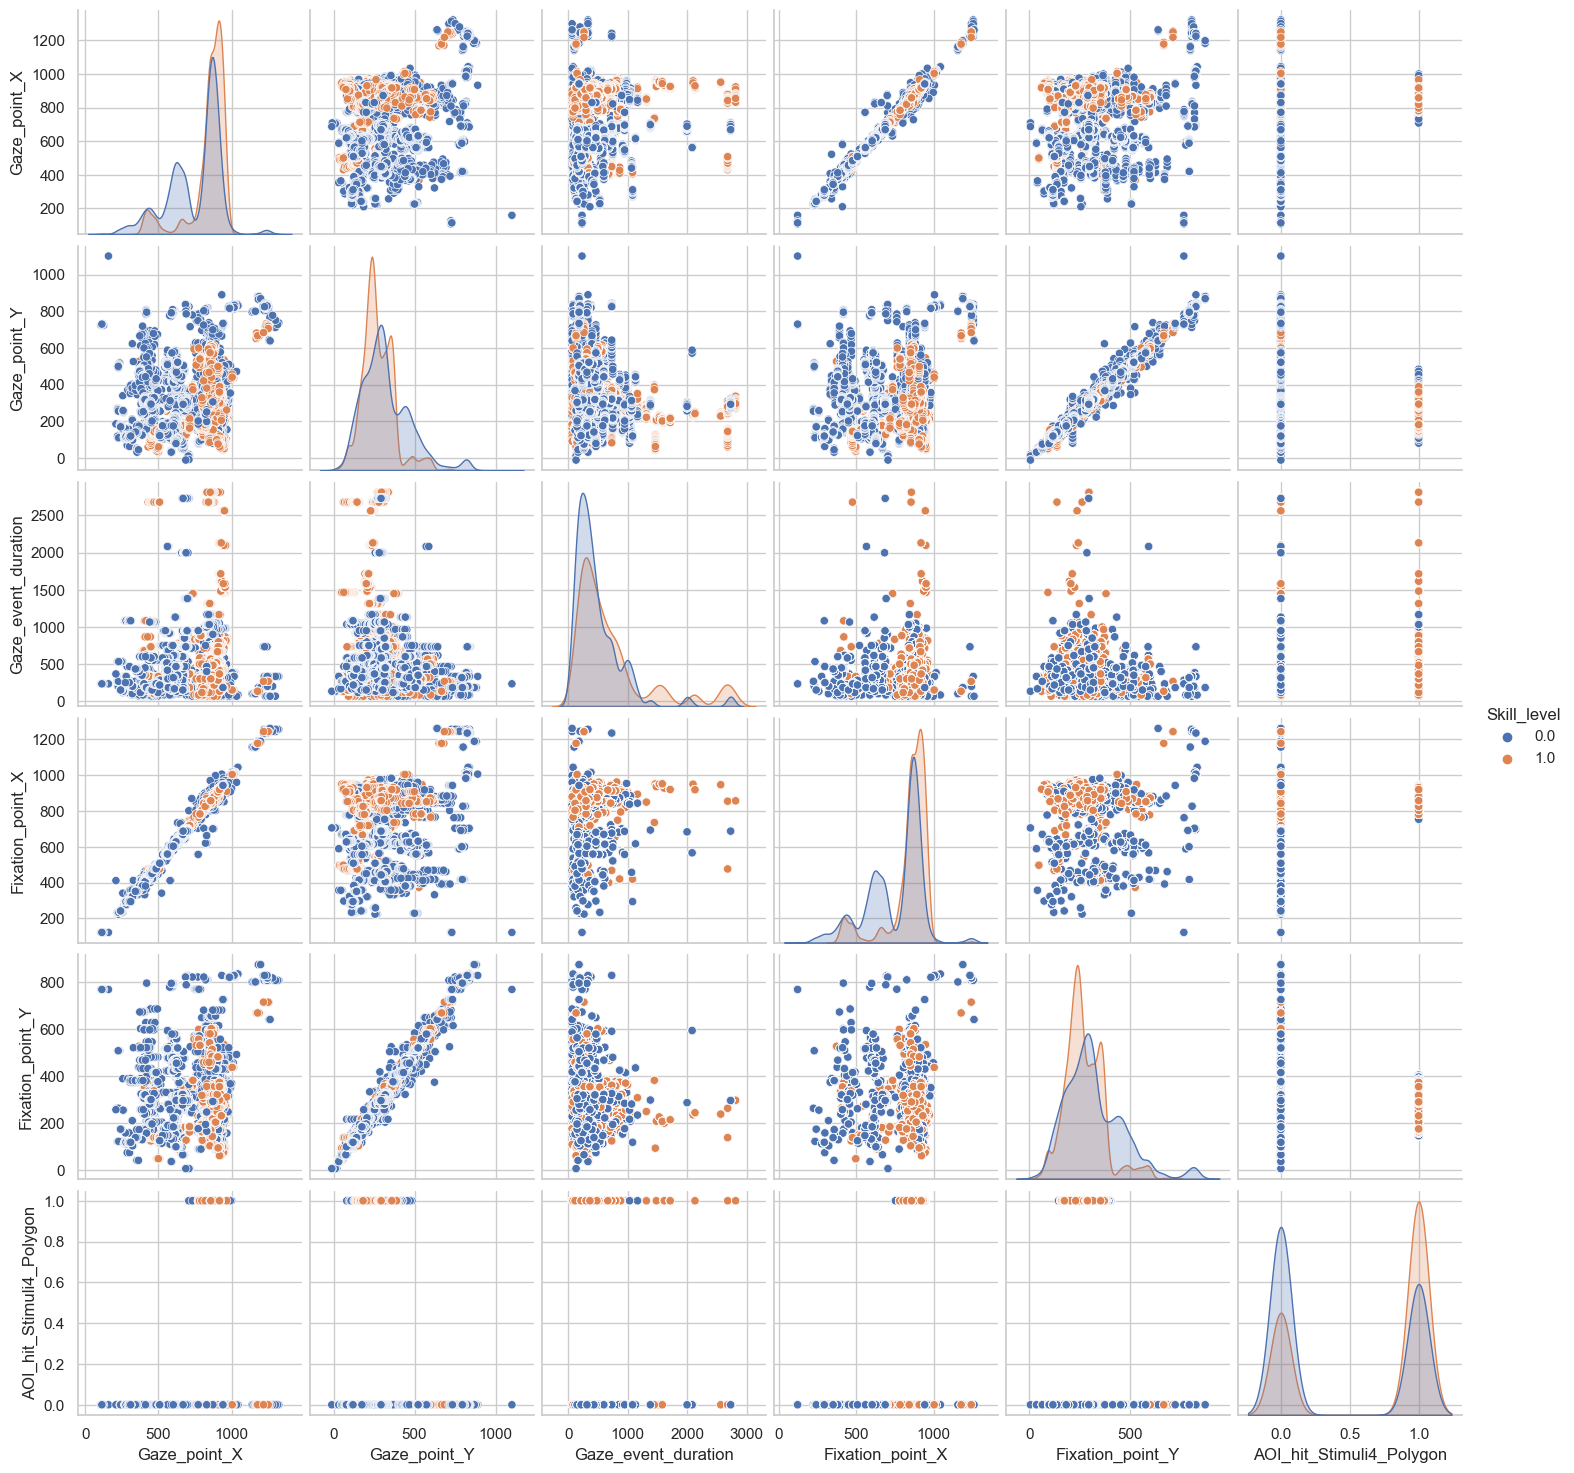

In [66]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [67]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [68]:
reg_model = LinearRegression()


In [69]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon
12810,785,161,882,794,162,1
14582,468,143,2679,476,138,0
15481,650,456,466,651,460,0
8769,827,533,300,830,517,0
7985,903,380,965,902,370,1


In [70]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_hat = reg_model.predict(X_test)

In [72]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
15796,0.0,0.273627,-0.273627
6548,1.0,0.506643,0.493357
1947,1.0,0.072616,0.927384
6471,1.0,0.725122,0.274878
1505,1.0,0.726777,0.273223


In [73]:
reg_model.coef_

array([-6.58116650e-04, -3.65992794e-05,  1.69277484e-04,  1.35868496e-03,
       -4.83124375e-04,  1.22543372e-01])

In [74]:
reg_model.intercept_

-0.08376014389672048

In [75]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0007
1,Gaze_point_Y,-0.0000
2,Gaze_event_duration,0.0002
3,Fixation_point_X,0.0014
4,Fixation_point_Y,-0.0005
5,AOI_hit_Stimuli4_Polygon,0.1225


In [76]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.17
Test data R-squared: 0.17


In [77]:
X_train.shape

(14434, 6)

In [78]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [79]:
adj_R2(X_train, y_train)

0.17

In [80]:
df_predictions.head()

,actuals,predictions,resid
15796,0.0,0.273627,-0.273627
6548,1.0,0.506643,0.493357
1947,1.0,0.072616,0.927384
6471,1.0,0.725122,0.274878
1505,1.0,0.726777,0.273223


In [81]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.212

In [82]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.212

In [83]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.461

In [84]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [85]:
my_estimator = LinearRegression()

In [86]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [87]:
R2

array([0.16447573, 0.17263842, 0.1698735 , 0.16407721, 0.17621563])

In [88]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [89]:
MSE = -NMSE
MSE

array([0.20841069, 0.20683481, 0.20747184, 0.20883966, 0.20540449])

In [90]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.207

In [91]:
RMSE = np.sqrt(MSE)
RMSE

array([0.4565202 , 0.45479095, 0.45549077, 0.45698978, 0.45321572])